## Importing all needed packages

#### Command to install spaCy package: *pip install spacy*


In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy

## First Analysis

### Mechanism to hidden some words from analysis.

In [16]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [17]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [18]:
df = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [19]:
len(df)

73169

### Some manipulation to the strings.

- lower case
- replace some symbols

In [20]:
df = df['review_text'].str.lower()
df.head()

0    sabe todos aqueles livros que ensinam você a c...
1    ensinamentos que eu tive quando li o livro:1. ...
2    sucinto livro de parábolas, o homem mais rico ...
3    de forma clara traz ensinamentos sobre educaçã...
4    o livro o homem mais rico da babilônia está fa...
Name: review_text, dtype: object

In [21]:
df[1]

'ensinamentos que eu tive quando li o livro:1. primeiro pague a si mesmo e depois aos outros.“uma parte de todos os seus ganhos pertencem exclusivamente a você.”quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. no livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. as outras 9 moedas você pode gastar. mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. gastar com necessidades, e não com desejos.precisamos gastar menos do que ganhamos.2. controle os seus gastos. muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. por isso, precisamos saber exatamente no que gastamos. é necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. multiplique o seu dinheiro.depois que você consegui

In [22]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [34]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

Time: 97.5191559791565


### Total of unique words.

In [24]:
print( 'List size: {}'.format( len(allWords) ) )

List size: 72097


### Build a word cloud with all unique words.

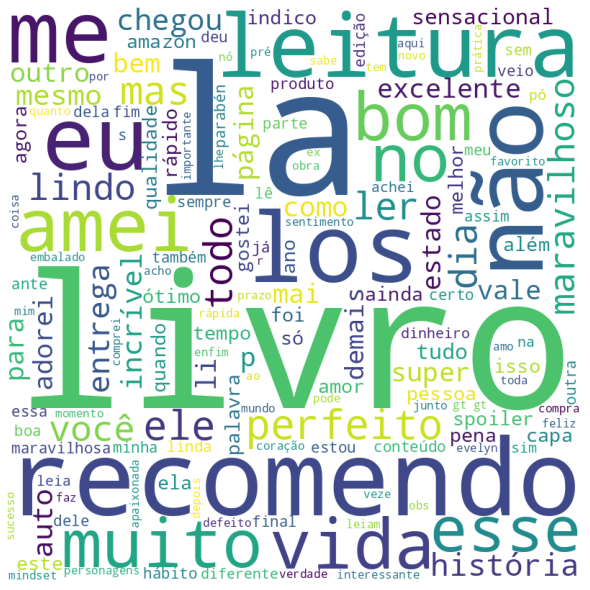

In [27]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

### Seeing the words and each total in a table way.

In [29]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

,word,count
0,sabe,667
1,todos,4719
2,aqueles,460
3,livros,4972
4,ensinam,23
5,você,5069
6,criar,349
7,agenda,4
8,para,22553
9,controle,168


In [30]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

,word,count
57,livro,50624
328,muito,27187
41,não,22855
8,para,22553
32,mas,14090
...,...,...
35683,(fazem,1
35687,engraçadinho!,1
35690,desculpas:,1
35691,identificou!,1


## Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.